In [1]:
#Creating a machine Learning model for practice and Deploy it 

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cali_housing=fetch_california_housing()
print(type(cali_housing))
cali_housing.keys()

<class 'sklearn.utils._bunch.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(cali_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
df1=pd.DataFrame(cali_housing.data)
df1.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
df1.columns
df1.columns=cali_housing.feature_names
df1.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23


In [7]:
# We have to convert the dataset into a separate New Dataframe(df1) than the one(cali_housing) in which the data was stored...otherwise error occurs

In [8]:
df1["Price"]=cali_housing.target   #setting the last column of the cali_housing as the target --> Wrong Thinking
df1.head(5)              #setting the target series as a Price column in the df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df1.corr()    #TO check the collinearity of the features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [10]:
#Creating the dataset
X=df1.iloc[:,:-1]      #Dependent features
y=df1.iloc[:,-1]       #Independent features 

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
#As all the features are normalized on different scales, we have to create a STANDARDISED scale for faster convergence of Gradient Descent

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()   #scaler becomes the object for standardizing the data

In [14]:
# mse=cross_val_score(lin_reg,X,y,)
# val=np.mean(mse)
# print(val*100)
# #r2=r2_score(

In [15]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)    #Not used fit_transform() so that the model doesnt get much info about the test data

##### Now the data is ready to be trained
###                 Model Training

In [16]:
#importing libraries
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()      #lin_reg becomes the object for regressing linearly like scaler

In [17]:
lin_reg.fit(X_train,y_train)     #Fitting the model on Linear Regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
print(lin_reg.coef_)     #Didnt work, CHECK later

[ 0.82334612  0.11306852 -0.26003425  0.30225805 -0.00524544 -0.04427497
 -0.92235886 -0.89314831]


### Prediction with Test Data

In [19]:
pred=lin_reg.predict(X_test)

In [20]:
#pred=pd.DataFrame(data=pred,dtype=np.float64)
#print(pred.head())
pred.shape

(4128,)

In [21]:
# pred=pd.DataFrame(pred)
# print(pred.columns)
# pred.head()

###  Checking the Quality of Model using Plots

In [22]:
import seaborn as sns
plt.scatter(y_test,pred)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
residual=y_test-pred
residual.describe()

count    4128.000000
mean        0.003034
std         0.725632
min        -5.816645
25%        -0.460509
50%        -0.117454
75%         0.325185
max         4.035529
Name: Price, dtype: float64

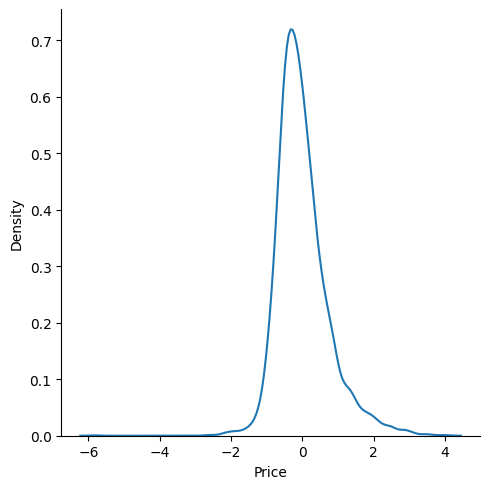

In [ ]:
#sns.displot(residual,kind='kde',aspect=2)
sns.displot(residual,kind='kde')   #should have a N0rmal Distri

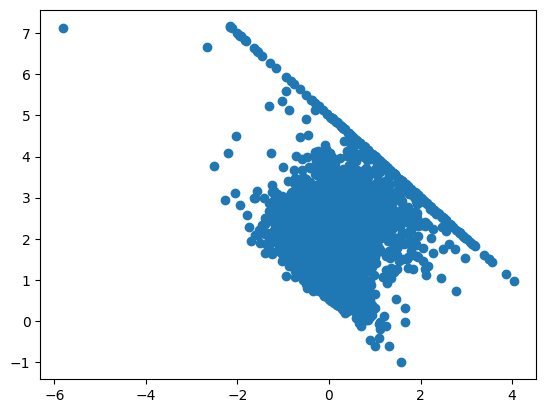

In [ ]:
plt.scatter(residual,pred)      #Evenly Distributed with minimal Outliers

### Now Measuring Performance using Metrics

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
mse=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(y_test,pred)
print(r2)
print(f"The R2 score is {r2} and the mse is {mse} and mae={mae}")

0.6107883257781745
The R2 score is 0.6107883257781745 and the mse is 0.5322649936173554 and mae=0.5322649936173554


In [ ]:
#compare=pd.DataFrame(data=[y_test,pred])
comparison = pd.DataFrame({'Actual': y_test.values,'Predicted': pred,'Diff':(y_test.values-pred)})  
#to bring two time-series data into 1 df we use dictionary(NOT work if one of them is a df)
#comparison.sort_values('Diff')
comparison.head()

,Actual,Predicted,Diff
0,1.226,0.754709,0.471291
1,1.261,0.422347,0.838653
2,2.205,2.740423,-0.535423
3,1.972,2.252319,-0.280319
4,3.356,2.980192,0.375808


### New Data Prediction

In [ ]:
print(cali_housing.data[0].shape)
cali_housing.data[0].reshape(1,-1)   #reshape(1,-1) helps reshape the data into passable data
print(lin_reg.predict(scaler.transform(cali_housing.data[0].reshape(1,-1))))

(8,)
[4.13452084]


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Pickling the Model File for Deployment

In [ ]:
import pickle
#It allows developers to convert complex Python objects, such as lists, dictionaries, and custom classes, into a byte stream, which can then be
#saved to a file or transmitted over a network.
pickle.dump(lin_reg,open('regmodel.pkl','wb'))


In [ ]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))
pickled_model.predict(scaler.transform(cali_housing.data[0].reshape(1,-1)))

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13452084])